# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [5]:
data = pd.read_csv('stock_data.csv')

#### Checking the shape of the dataset

In [6]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 340 rows and 15 columns.


#### Displaying few rows of the dataset

In [7]:
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


#### Checking the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

#### Creating a copy of original data

In [9]:
df = data.copy()

#### Checking for duplicates and missing values

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


#### Statistical summary of the dataset

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,ZTS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,Zoetis,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


**Observations**
- There are 340 rows and 15 columns.
- There are no missing or duplicate values in the dataset.
- There are 4 object-type columns and the rest are numerical, float64 and int64.
- The dataset contains a wide range of numerical features indicating large variability and potential outliers. Many standard deviations for some columns are quite large compared to their means.




## Exploratory Data Analysis (EDA)



**Questions for analysis:**

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

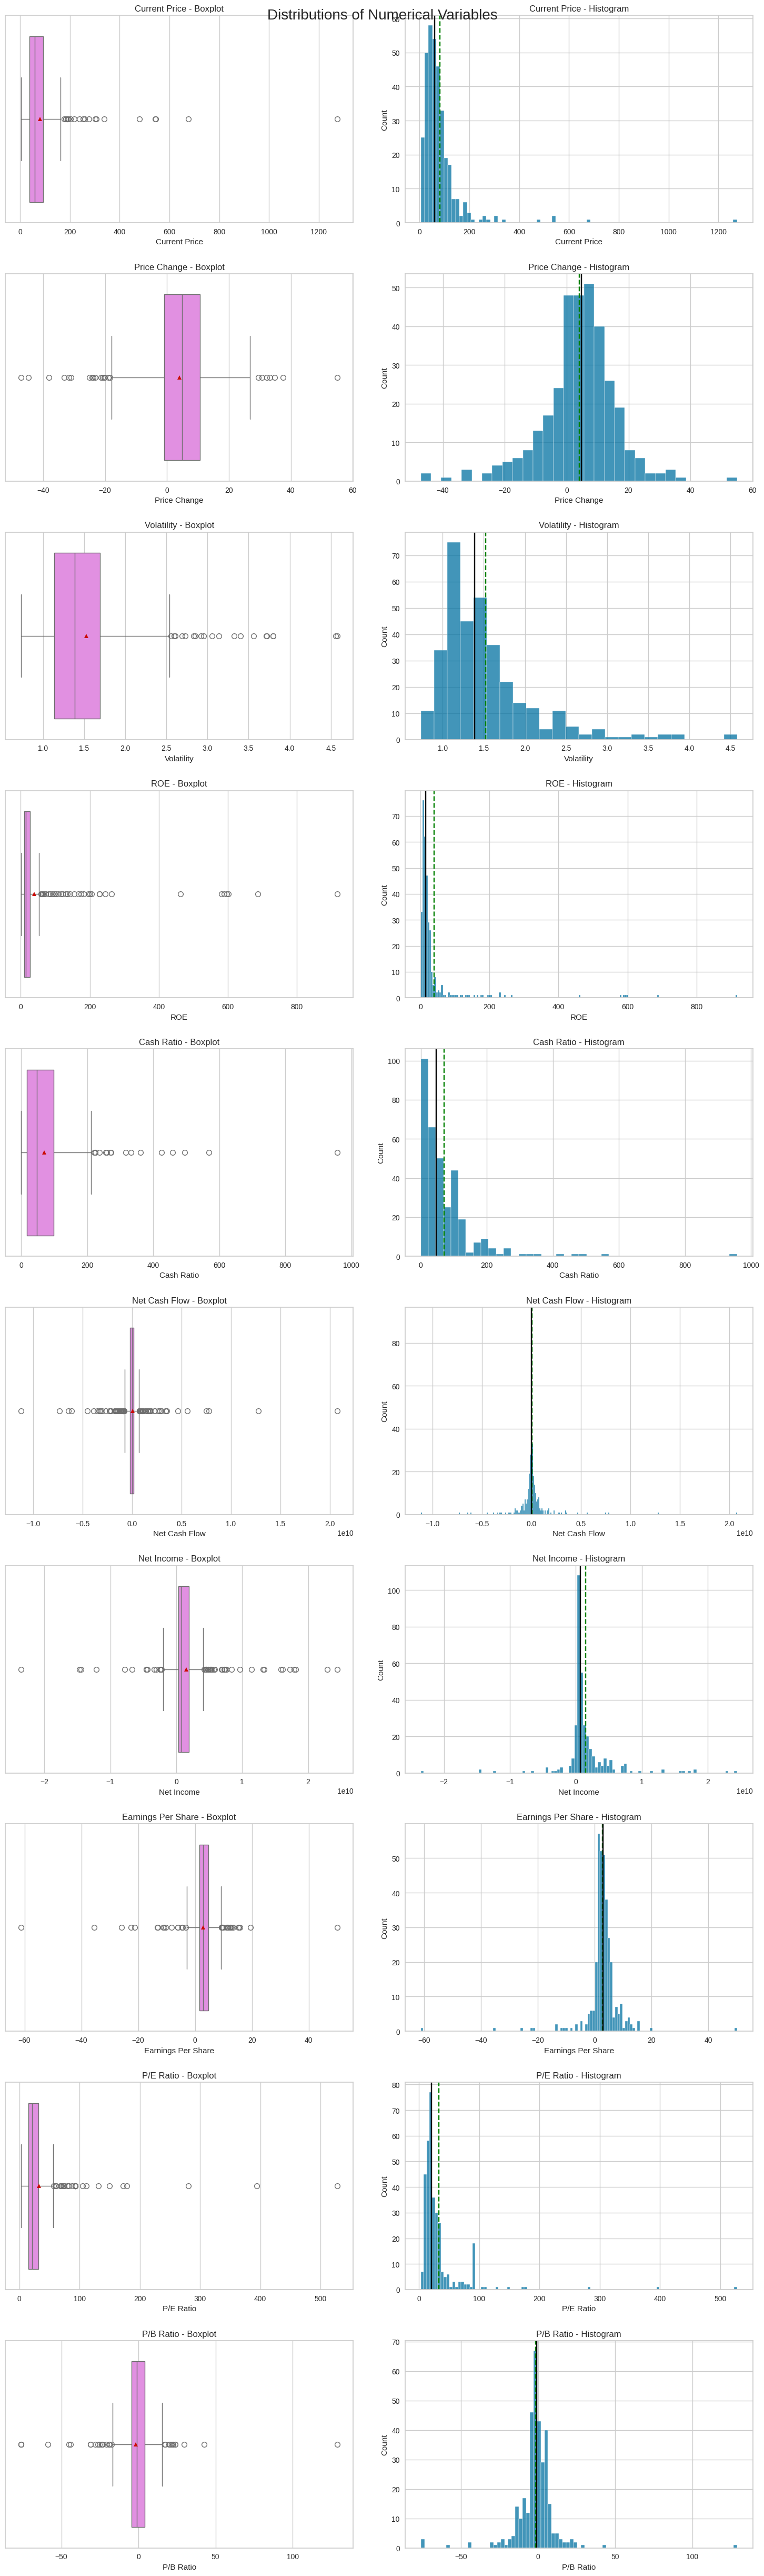

In [15]:
# Modify the histogram_boxplot function to accept axes
def histogram_boxplot_subplots(df, feature, ax_box, ax_hist, kde=False, bins=None):
    """
    Boxplot and histogram combined for subplots

    data: dataframe
    feature: dataframe column
    ax_box: axes object for the boxplot
    ax_hist: axes object for the histogram
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    sns.boxplot(
        data=df, x=feature, ax=ax_box, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist
    )  # For histogram
    ax_hist.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# Identify numerical columns (excluding 'Estimated Shares Outstanding' as it has a very large range)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Estimated Shares Outstanding')


# Create subplots for all numerical features
num_cols = len(numerical_cols)
n_rows = (num_cols + 1) // 2 * 2 # Ensure an even number of rows for pairs of boxplot/histogram
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
fig.suptitle("Distributions of Numerical Variables", fontsize=20)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical columns and plot
for i, col in enumerate(numerical_cols):
    # Each column needs two subplots: one for boxplot and one for histogram
    ax_box = axes[2 * i]
    ax_hist = axes[2 * i + 1]
    histogram_boxplot_subplots(df, col, ax_box, ax_hist)
    ax_box.set_title(f'{col} - Boxplot')
    ax_hist.set_title(f'{col} - Histogram')

# Hide any unused subplots
if num_cols * 2 < len(axes):
    for j in range(num_cols * 2, len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout(pad=2.0)
plt.show()

#### **Observations**


- Most of the plots generally share the same features. The distributions show a strong right-skew and a clustering of the majority around zero, with a small number of extreme positive and/or negative outliers that heavily influence the overall scale.
- The distribution of `Current Price` is right-skewed with upper outliers. 75% of stock prices are below ~90 dollars, with a maximum price of ~1200 dollars.
- `Price Change` appears to be roughly symmetrical with outliers present on both ends, indicating some stocks with extreme positive or negative price movements. The average price change is about 4% over the 13 weeks.
- `Volatility`showed a right-skewed distribution for the standard deviation of stock prices over the past 13 weeks. It shows most stocks having lower volatility and a few stocks being significantly more volatile, as shown by the outliers.
- `P/E Ratio`: For the majority of companies, the ratio of the current stock price to the earnings per share are lower than 32, however, there are many extreme upper outliers, representing companies with exceptionally high P/E Ratios.
- `P/B Ratio`: The distribution is strongly right-skewed, with most companies having P/B ratios clustered around zero or in the negative range. There are positive and negative outliers, representing companies with market values significantly different from their book values.









**This function below is used for the analysis of `GICS Sector` and `GICS Sub Industry`**  ⏬

In [16]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

**`GICS Sector`**

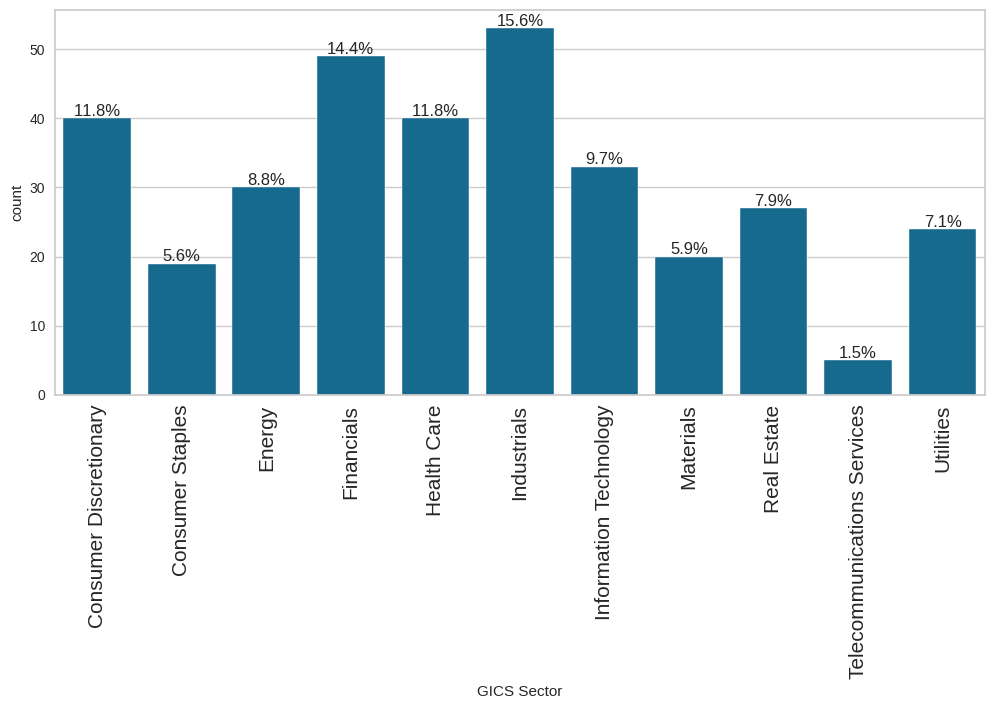

In [17]:
labeled_barplot(df, 'GICS Sector', perc=True)

**Observations**

- 'Industrials' make up the largest GICS sector with 15.6%, followed by 'Financials'.
- 'Telecommunications Services' makes up the smallest GICS sector at 1.5%.


**`GICS Sub Industry`**

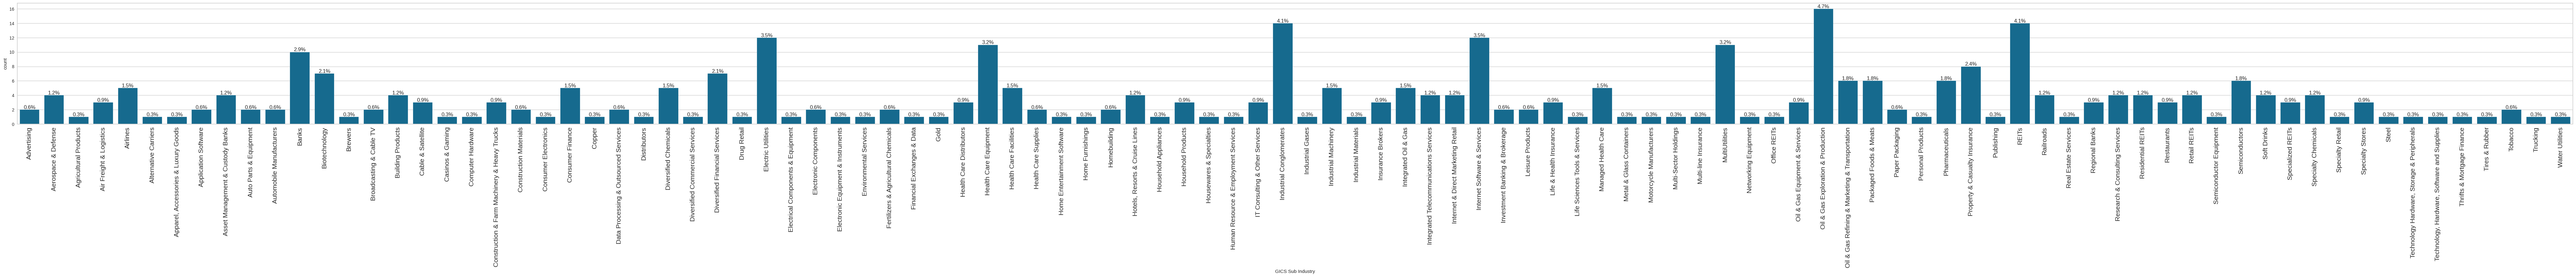

In [18]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

**Observations**
*  The largest GICS sub industry is 'Oil and Gas Exploration & Production'.
- The lowest percentage observed was 0.3% and shared by more than 10 sub industries.




### Bivariate Analysis

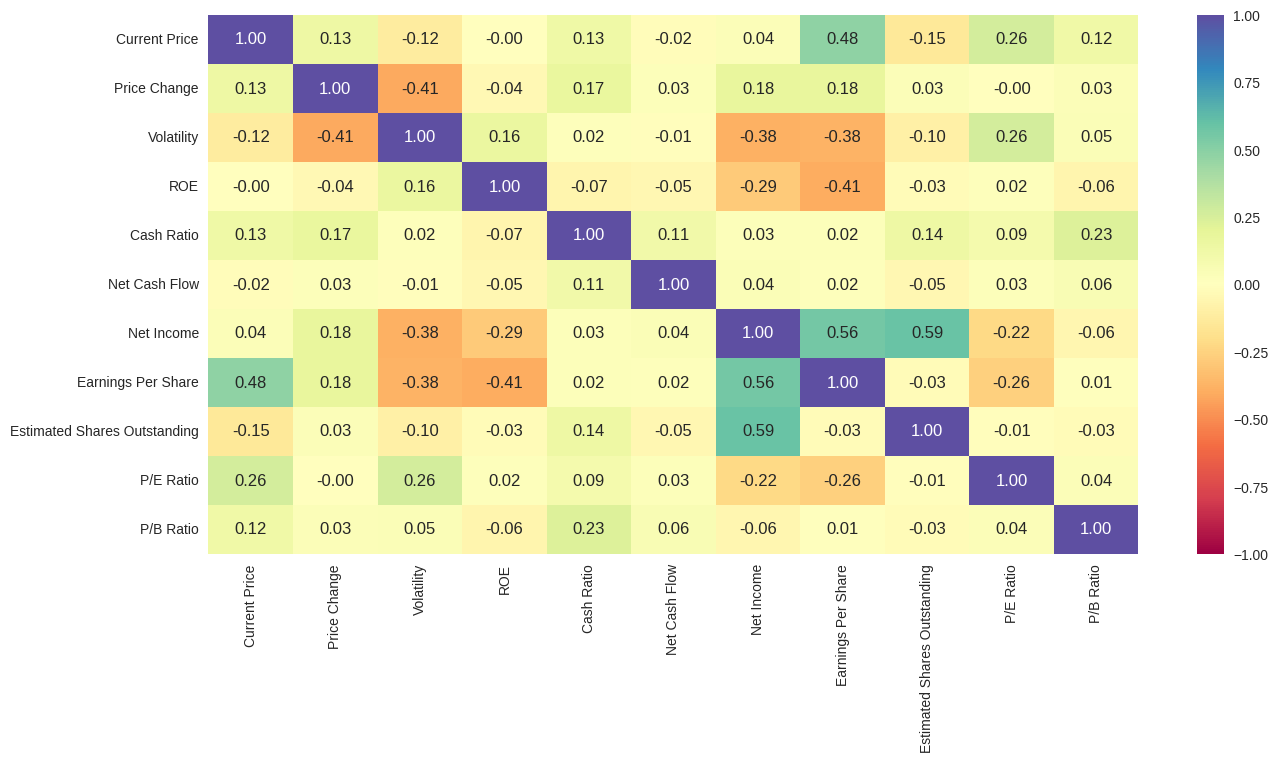

In [19]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**
- `Current Price` is highly correlated with `Earnings Per Share`.
- `Price Change` is the most correlated, negatively, with `Volatility`.
- `Volatility`, `Net Income`, and `Earnings Per Share` share a strong negative correlation.
- The strongest positive correlation is `Net Income`, `Estimated Shares Outstanding` and `Earnings Per Share`.
- `Earnings Per Share`has the most strong correlations followed by `Net Income`.
- There's a notable positive correlation between `Net Cash Flow` and `Net Income`, which is expected as higher net income often leads to higher cash flow.
- `P/B Ratio` has a strong positive correlation with `Current Price` and `P/E Ratio`.


**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

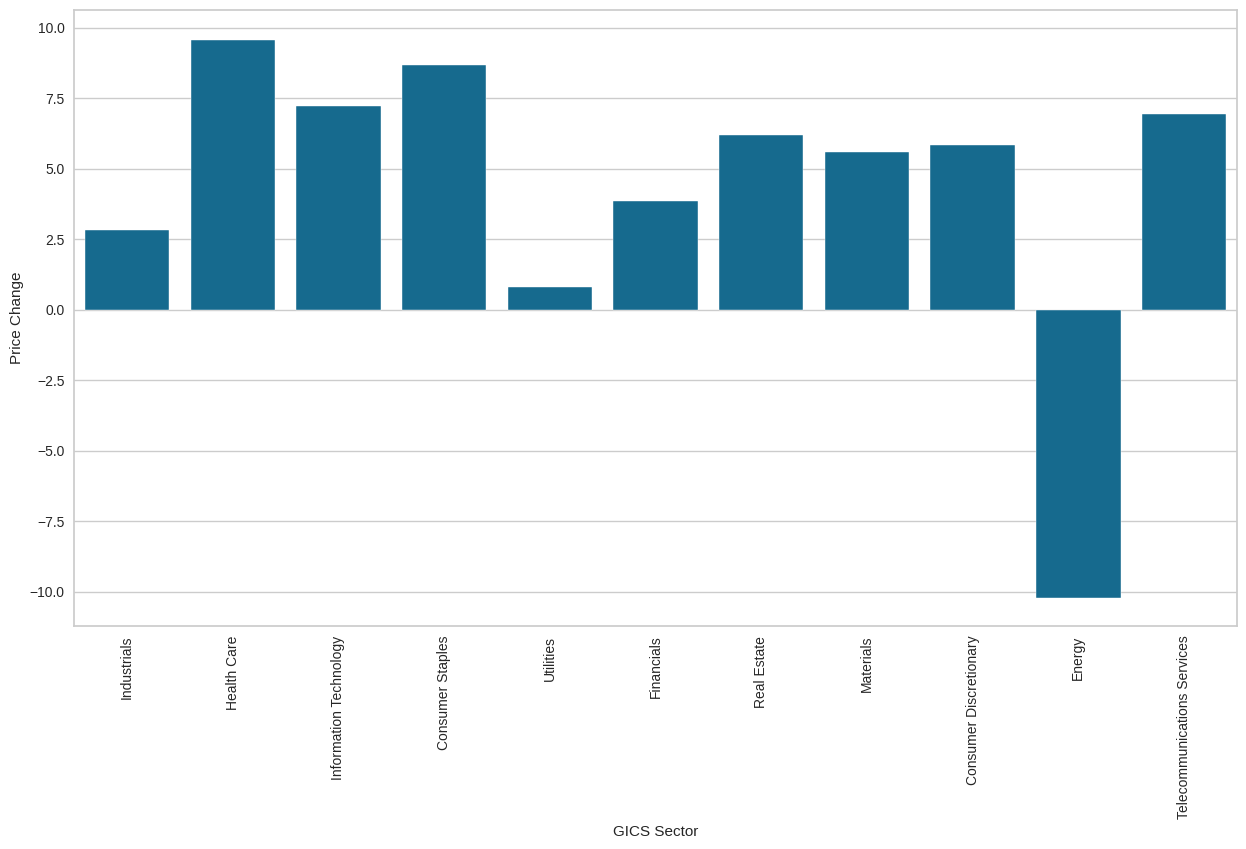

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

  **Observations**

  *   'Health Care' has the largest price increase.
  *   'Energy' suffered the most significant negative price change.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

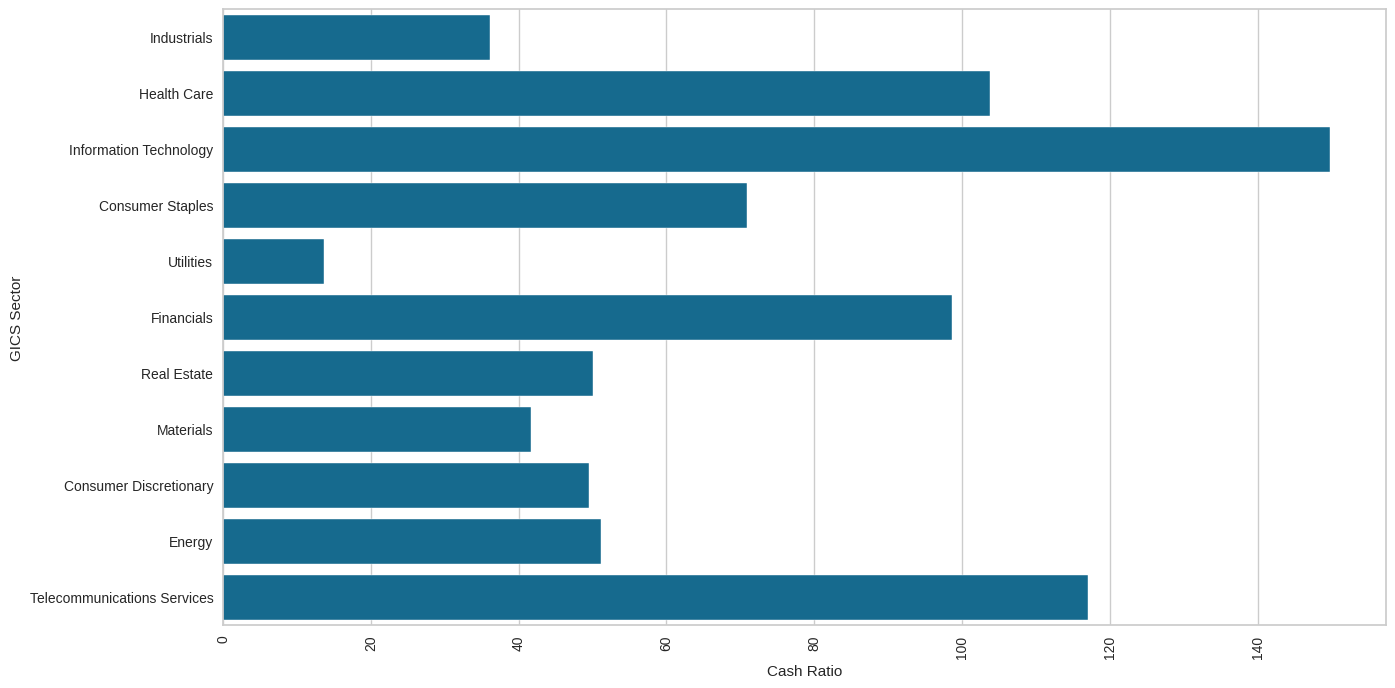

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Cash Ratio', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

  **Observations**

- The largest Cash Ratio across the economic sectors is 'Health Care', followed by 'Telecommunications Services'
- The sector with the smallest Cash Ratio is 'Utilities'.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

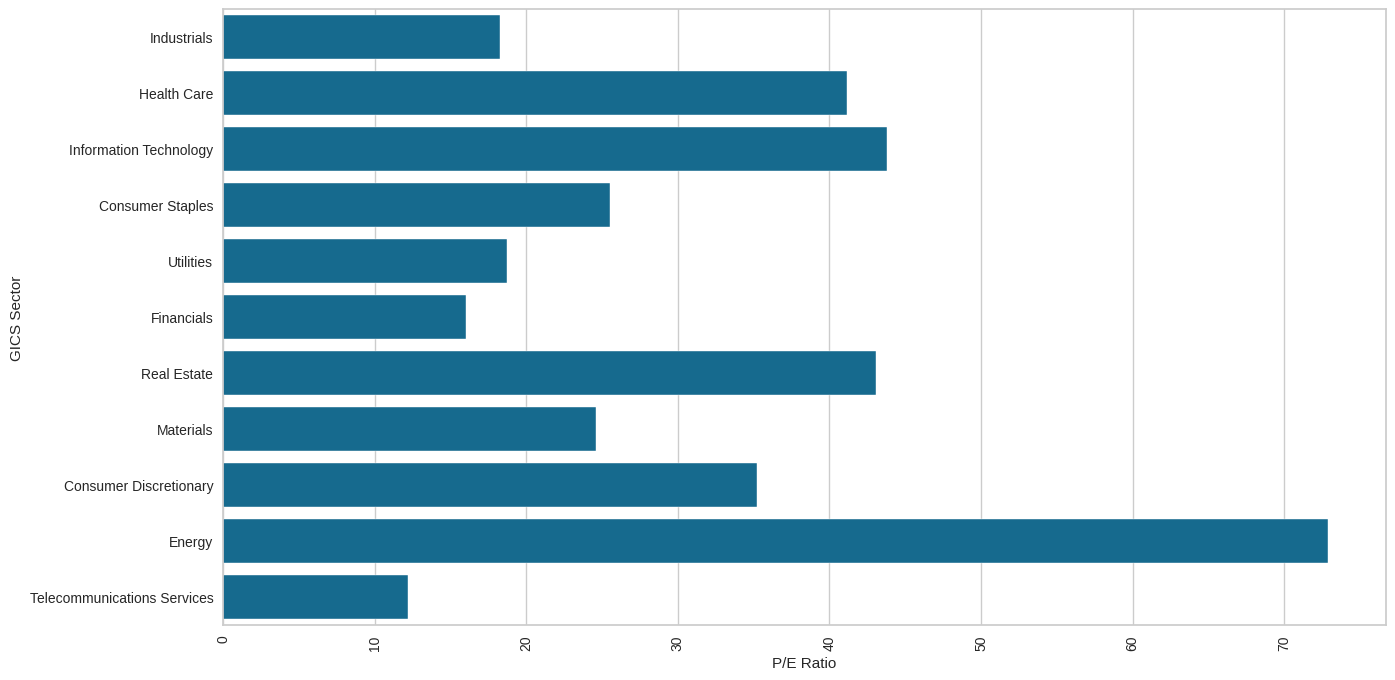

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='P/E Ratio', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

  **Observations**
  
  - 'Energy' has the highest P/E Ratio across the sectors.
  - The smallest P/E Ratio in comparison to the other sectors is 'Telecommunication Services'

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

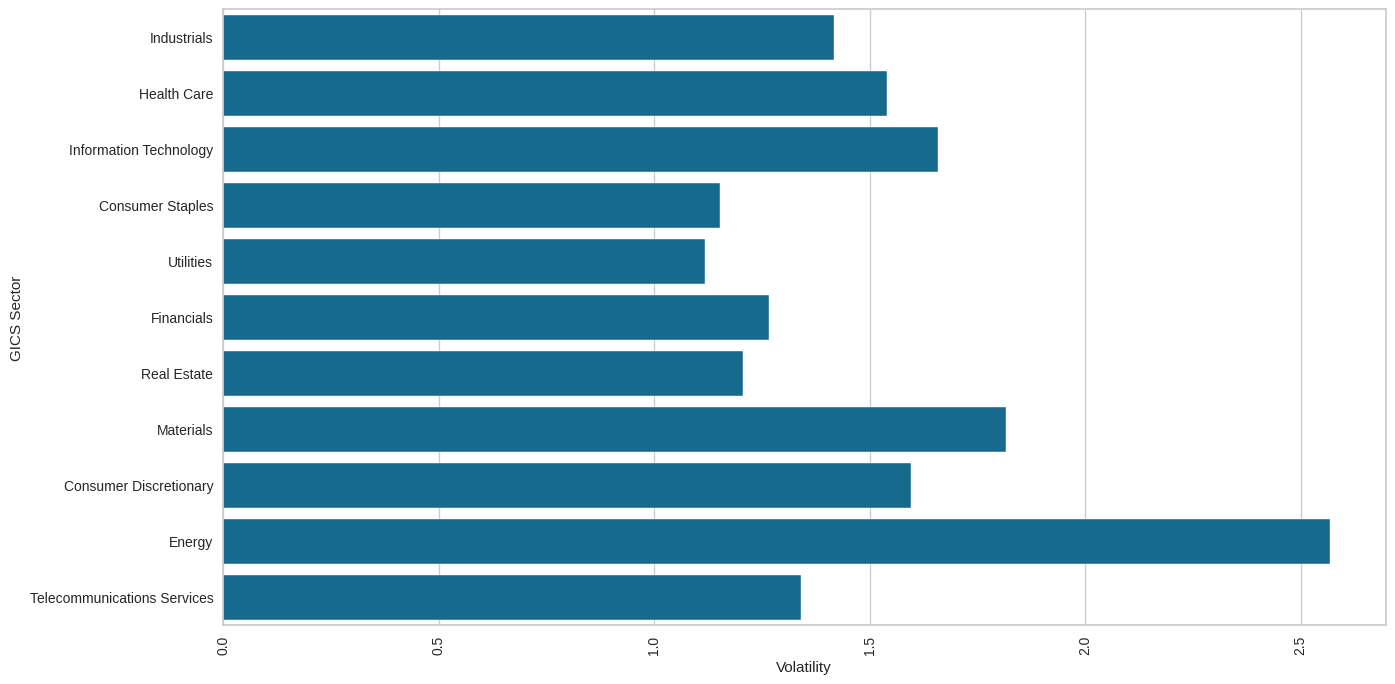

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Volatility', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

  **Observations**

  *   The highest volatility belongs to the 'Energy' sector.
  *   The sector with the least volatility, is 'Utilities'.

## Data Preprocessing

- Duplicate value check ✅
- Missing value treatment ✅
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

#### There were no missing values or duplicate values.

#### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

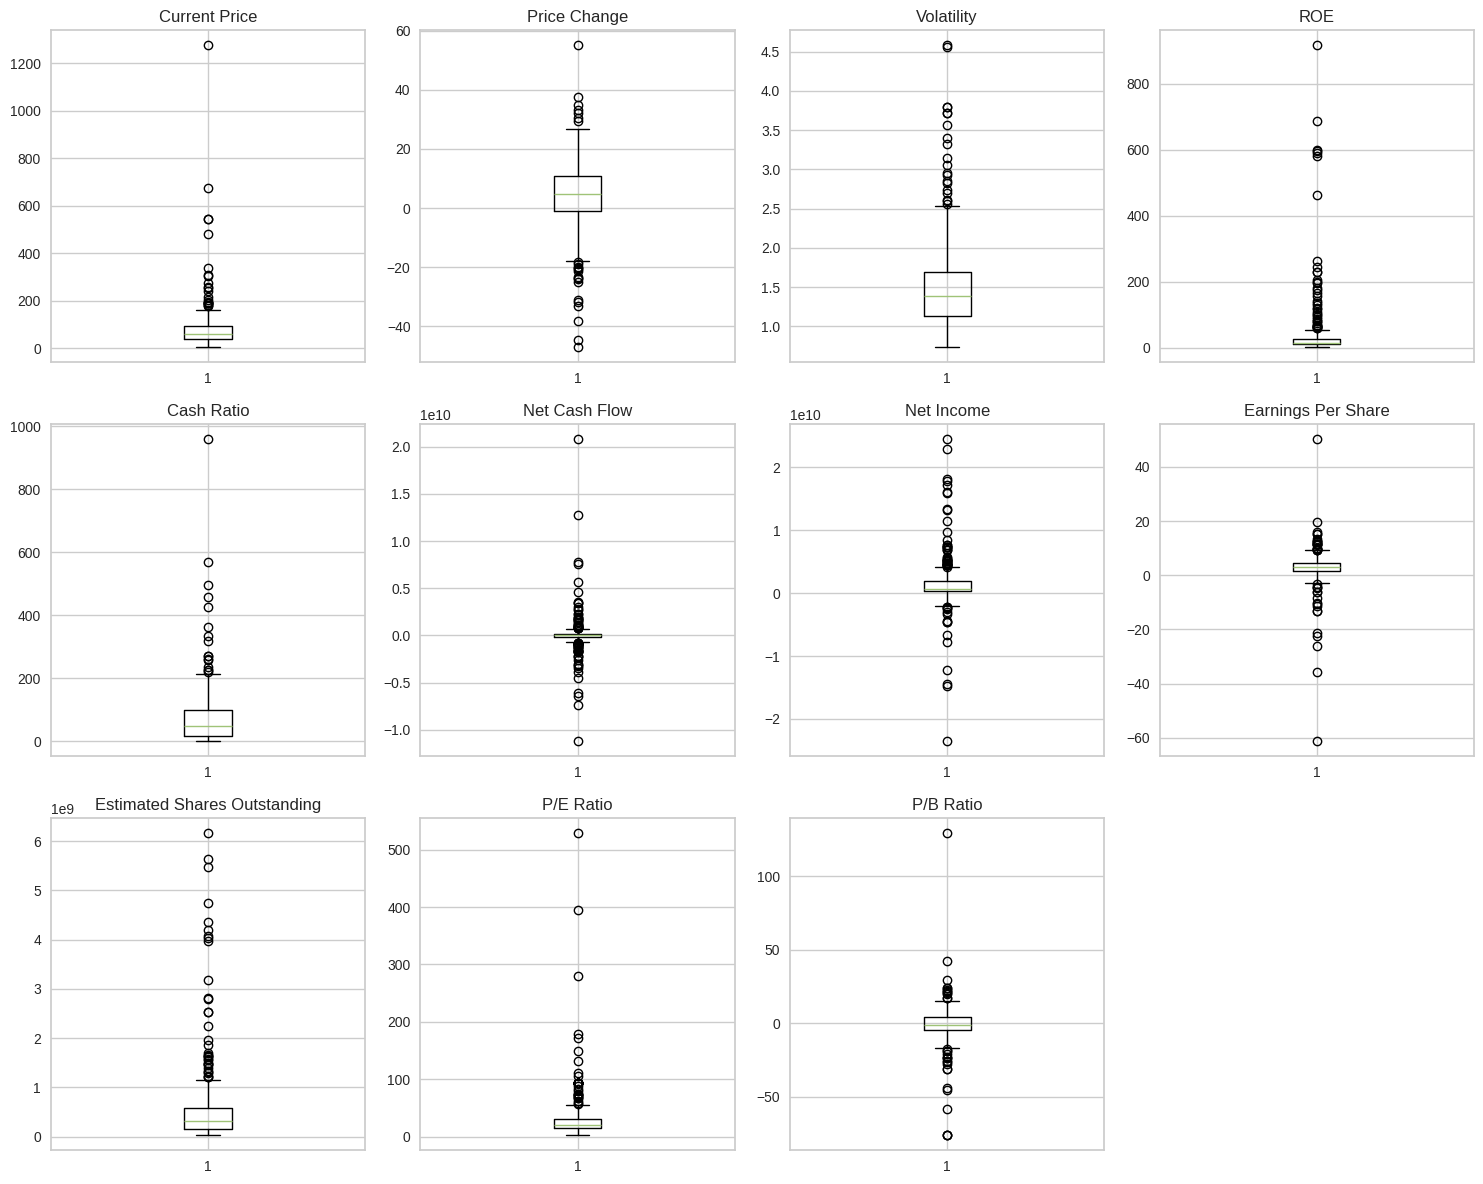

In [24]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*   In the context of stock prices and financial indicators, outliers can represent companies with unique characteristics or performance.

- Removing these outliers could mean losing insight into the distinct groups of companies that could form their own valuable clusters.

 Therefore, I will be leaving the outliers in the data for further analysis.



### Scaling

- Let's scale the data before we proceed with clustering.

In [25]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [26]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

#### Applying Principal Component Analysis (PCA)

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca_data = pca.fit_transform(subset_scaled_df)

# Let's convert the above result into a dataframe as in your example.
pca_df = pd.DataFrame(
    data=pca_data, columns = [f"Principal Component {i+1}" for i in range(pca.n_components)]
)
# Display the first few rows of the PCA dataframe
print("PCA transformed data (first 5 rows):")
display(pca_df.head())

# Print the explained variance per principal component as in your example.
print("\nExplained variance per principal component: {}".format(
    pca.explained_variance_ratio_
))

PCA transformed data (first 5 rows):


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8
0,1.228300,-0.915282,-0.314396,0.330916,-0.407275,-0.121342,0.920151,0.386044
1,0.132905,-1.024312,0.988017,0.281161,-0.716609,0.185424,0.880215,0.359492
2,1.071312,-0.751996,0.798471,0.314448,0.276986,0.218053,0.054897,-0.384482
3,0.126537,1.176945,0.915497,0.626794,-0.001351,-0.076122,-0.885556,0.217026
4,-0.576854,1.113511,3.399115,-0.280629,-1.622087,0.918350,-0.954562,0.277689



Explained variance per principal component: [0.22770322 0.14358674 0.120947   0.10089366 0.09907929 0.08670985
 0.0749892  0.06503908]


## K-means Clustering

### Checking Elbow Plot

In [28]:
k_means_df = pca_df.copy()

Number of Clusters: 1 	Average Distortion: 2.381996494751328
Number of Clusters: 2 	Average Distortion: 2.2071869699818407
Number of Clusters: 3 	Average Distortion: 2.1252978780037366
Number of Clusters: 4 	Average Distortion: 1.9977689638811051
Number of Clusters: 5 	Average Distortion: 1.9512003951206425
Number of Clusters: 6 	Average Distortion: 1.8910302203675615
Number of Clusters: 7 	Average Distortion: 1.868952526765184
Number of Clusters: 8 	Average Distortion: 1.779855415394731
Number of Clusters: 9 	Average Distortion: 1.7256217757135255
Number of Clusters: 10 	Average Distortion: 1.6928049344268041
Number of Clusters: 11 	Average Distortion: 1.633890049099966
Number of Clusters: 12 	Average Distortion: 1.6049862939730615
Number of Clusters: 13 	Average Distortion: 1.5871711827897041
Number of Clusters: 14 	Average Distortion: 1.550668371153078


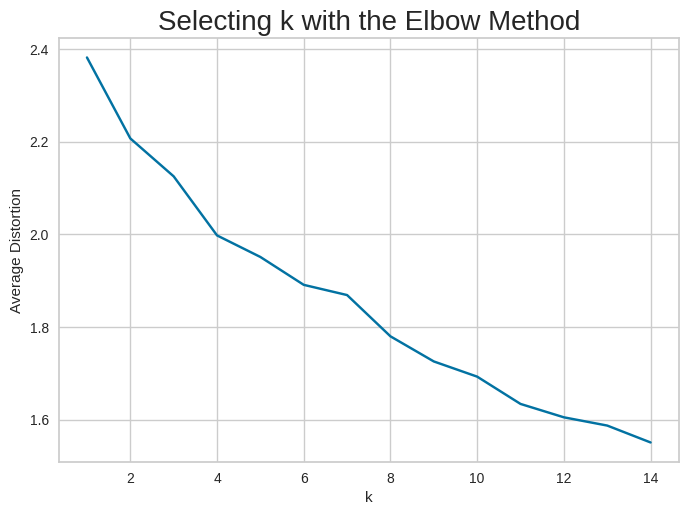

In [29]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

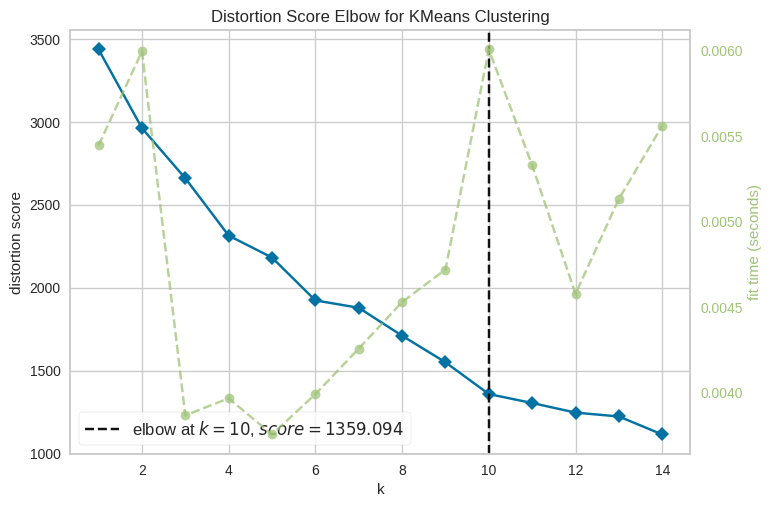

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

- The appropriate value of k from the elbow curve appears to be 10.

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.45937836905705565)
For n_clusters = 3, the silhouette score is 0.45092129652798274)
For n_clusters = 4, the silhouette score is 0.47567109834604837)
For n_clusters = 5, the silhouette score is 0.4030668055092591)
For n_clusters = 6, the silhouette score is 0.40283486998487317)
For n_clusters = 7, the silhouette score is 0.4013171974049798)
For n_clusters = 8, the silhouette score is 0.11890032059649676)
For n_clusters = 9, the silhouette score is 0.13354664711473244)
For n_clusters = 10, the silhouette score is 0.32722908326018413)
For n_clusters = 11, the silhouette score is 0.1249811010307883)
For n_clusters = 12, the silhouette score is 0.2221976103288767)
For n_clusters = 13, the silhouette score is 0.22654485505836905)
For n_clusters = 14, the silhouette score is 0.1609181004031028)


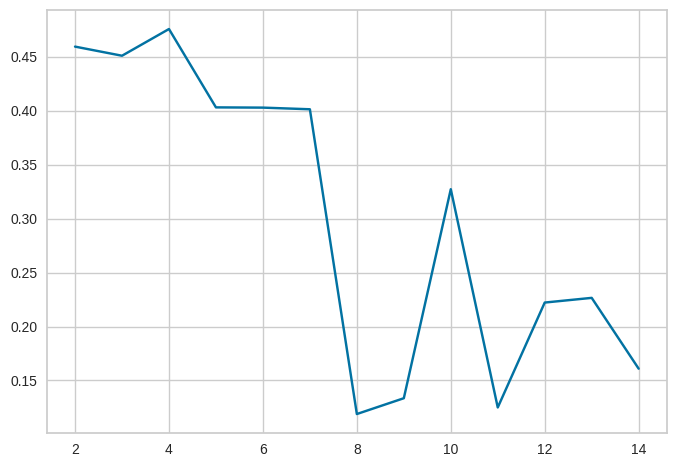

In [31]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

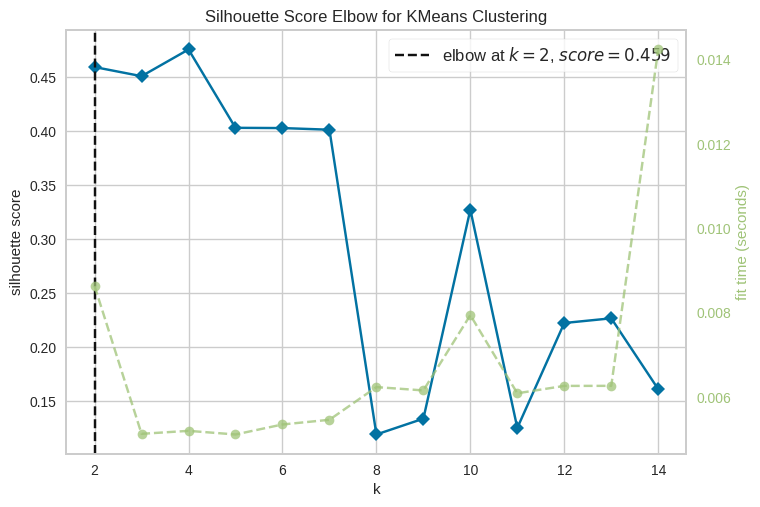

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

- This model suggests k=2 to be most optimal.
- The scores for k=4, 5, 6, and 7 are also relatively high compared to the others. These suggest potentially more meaningful groupings beyond just two broad categories.



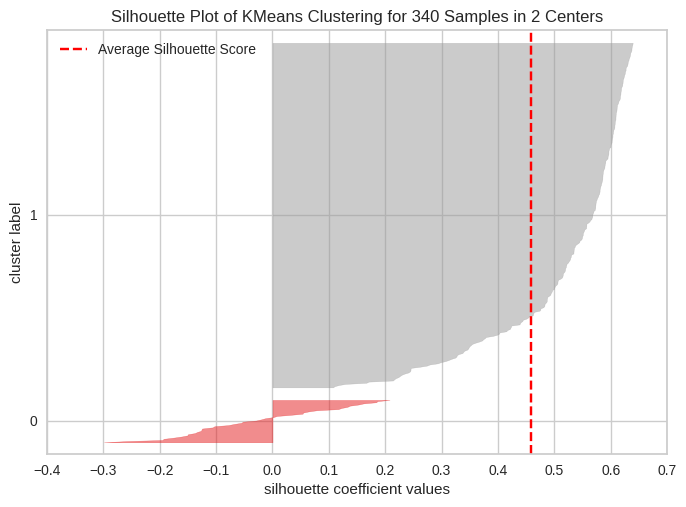

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

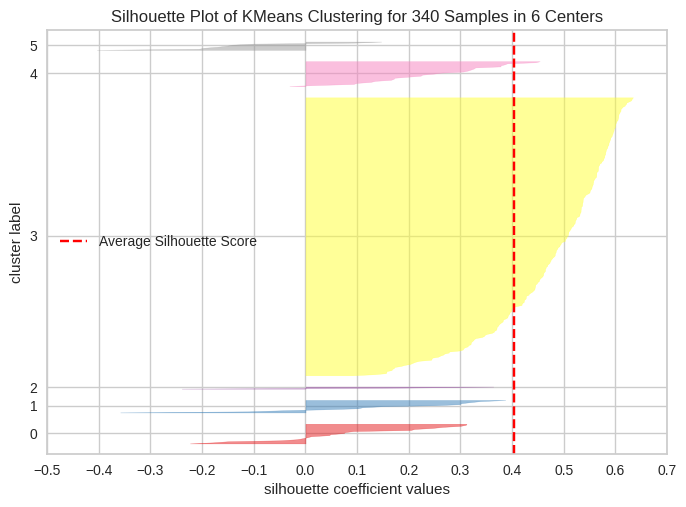

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

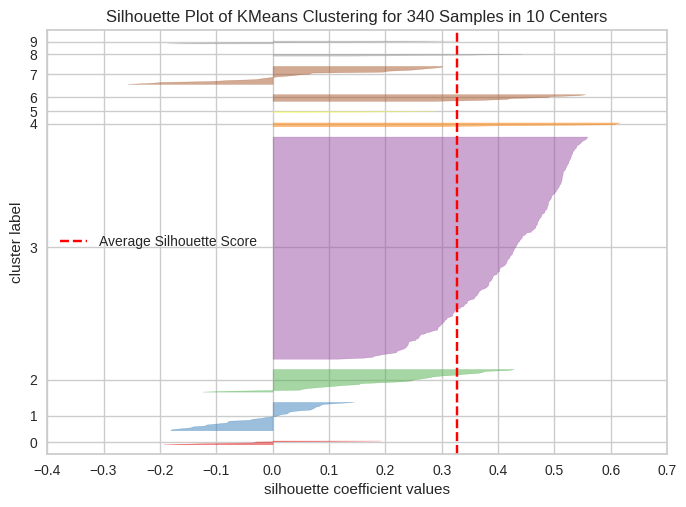

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
# finding optimal no. of clusters with the elbow method k-value
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

- Although the initial silhouette score model suggested k=2, this split would not give enough meaningful analysis and insight given the context of our objective.
- In addition to the k=10 model from the elbow method and the original k=2 model, I included a k=6 plot. This was one of the higher substantial silhouette scores, which shows the most separated and well-defined clustering. This will be the optimal number of clusters for the best interpretability down the line.
- For the k=10 silhouette plot, the clusters are tighter, but may be splitting similar groups.


### Creating Final Model

In [36]:
# final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [37]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [38]:
km_cluster_profile = df1.select_dtypes(include=np.number).groupby("KM_segments").mean()


In [39]:
## Groupby the cluster labels
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [40]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,80.152167,14.571437,1.829679,28.100000,321.850000,625929050.000000,942050500.000000,2.010500,790456335.265000,45.067457,8.307945,20
1,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
2,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3
3,73.685792,5.096240,1.374381,35.237037,50.514815,657170.370370,1495350300.000000,3.716870,423731239.720778,23.431970,-3.542190,270
4,35.394401,-16.203598,2.838004,43.560000,47.280000,-173823640.000000,-2048824000.000000,-5.352800,485462383.961600,77.206371,1.611452,25
5,489.313326,9.749852,1.687223,14.555556,152.666667,248373888.888889,655419333.333333,11.315556,160803192.135556,167.363342,24.013287,9


In [41]:
## Print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle Internatio

In [42]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          1
             Health Care                     5
             Information Technology          8
             Materials                       1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     3
             Information Technology          1
             Telecommunications Services     2
2            Energy                          3
3            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
4            Energy                         20
             Industrials                     1
             Information Technology          2
             Materials                       2
5            Consumer Discretionary          3
             Health Care                     3
             Information Technology          2
             Real Estate                     1
Name: Security, dtype: int64

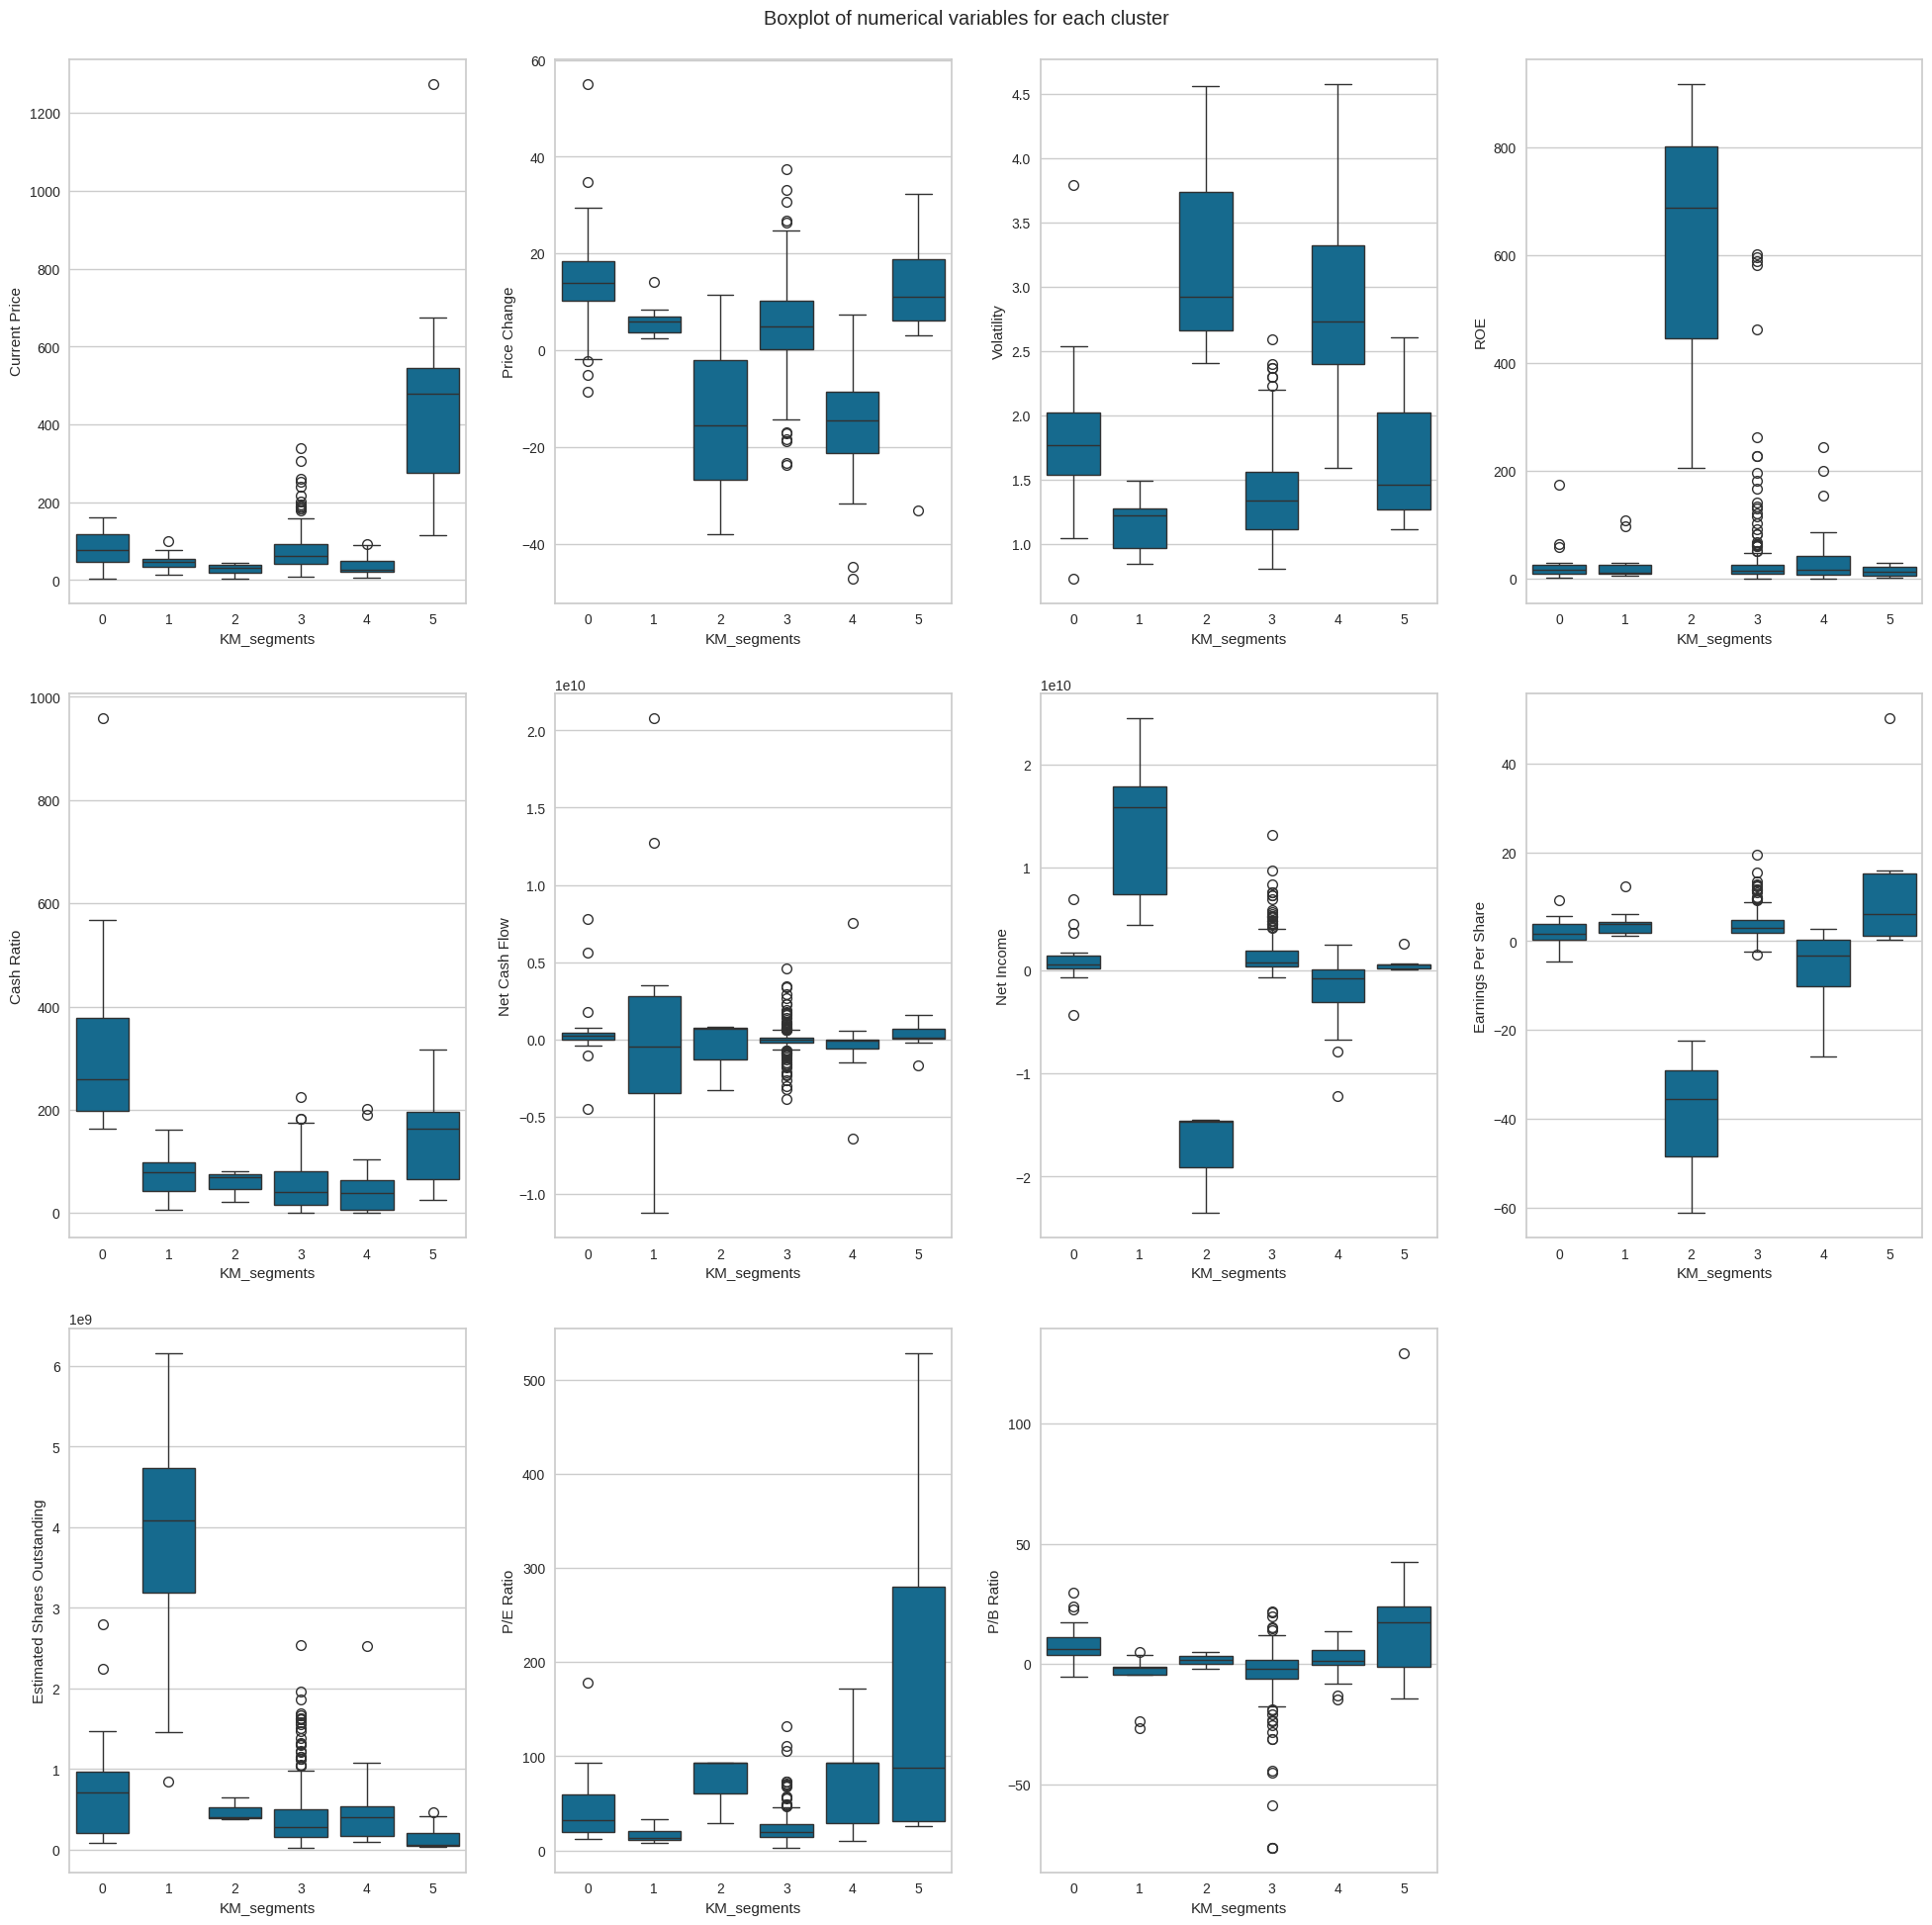

In [43]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

**Cluster 0**:
- This cluster primarily represents stocks in the Information Technology sector.
- It has the highest Price Change and Cash Ratio, indicating strong liquidity and liability reserves with the most significant price increase.
- This aligns with the high P/E ratio and potentially high growth observed in this cluster


**Cluster 1**:
-  The Financials sector is heavily represented in this cluster with the highest average number of Estimated Shares Outstanding.
- These stocks also rank the highest in Net Cash Flow and Net Income, as well as, the lowest average Volatility.
- The average P/B Ratio for this cluster is notably negative.


**Cluster 2**:
- This cluster of stocks from the Energy sector exhibit the highest average volatility and is composed of the fewest number of companies.
- These stocks, on average, rank the lowest in Current Price, Net Cash Flow, Net Income, and Earnings Per Share. Price change is notably very low as well.
- However, it has the highest average Return on Equity (ROE),indicating companies may have been very profitable before the significant negative price change.


**Cluster 3**:
- This cluster contains the largest, most diverse array of stocks from various sectors.
- The averages values across its cluster profile are all in moderate ranges in comparison to other clusters.

**Cluster 4**:
- Similar to cluster 2, cluster 4 is heavily dominated by the Energy sector.
- Low profitability in this cluster is indicated by its significant Negative Average Earnings Per Share and Net Income and ranking the lowest average.
- In addition, this cluster also has a notably high volatility.

**Cluster 5**:
- The stocks in this cluster are, on average, the most expensive in terms of their share price.
- Primarily representing the Consumer Discretionary and Information Technology sectors.
- These stocks also had highest Earnings Per Share, P/E Ratio, and P/B Ratio. These combined with a high average Cash Ratio and average price indicate even more the high-value and strong liquidity shown.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [44]:
hc_df = pca_df.copy()

In [45]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9199831051374695.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8312225984535044.
Cophenetic correlation for Euclidean distance and average linkage is 0.9335945773642892.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7780585469534022.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9149228501228918.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.4551673724151198.
Cophenetic correlation for Chebyshev distance and average linkage is 0.927439737846135.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.4841960216140245.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9080464951513186.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8695557610304762.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9245895418530143.
Cophenetic cor

**Let's explore different linkage methods with Euclidean distance only.**

In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9199831051374695.
Cophenetic correlation for complete linkage is 0.8312225984535044.
Cophenetic correlation for average linkage is 0.9335945773642892.
Cophenetic correlation for centroid linkage is 0.9512863929778922.
Cophenetic correlation for ward linkage is 0.6914770181875302.
Cophenetic correlation for weighted linkage is 0.7780585469534022.
****************************************************************************************************
Highest cophenetic correlation is 0.9512863929778922, which is obtained with centroid linkage.



  > We see the highest cophenetic correlation with Euclidean distance and centroid linkage.



**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

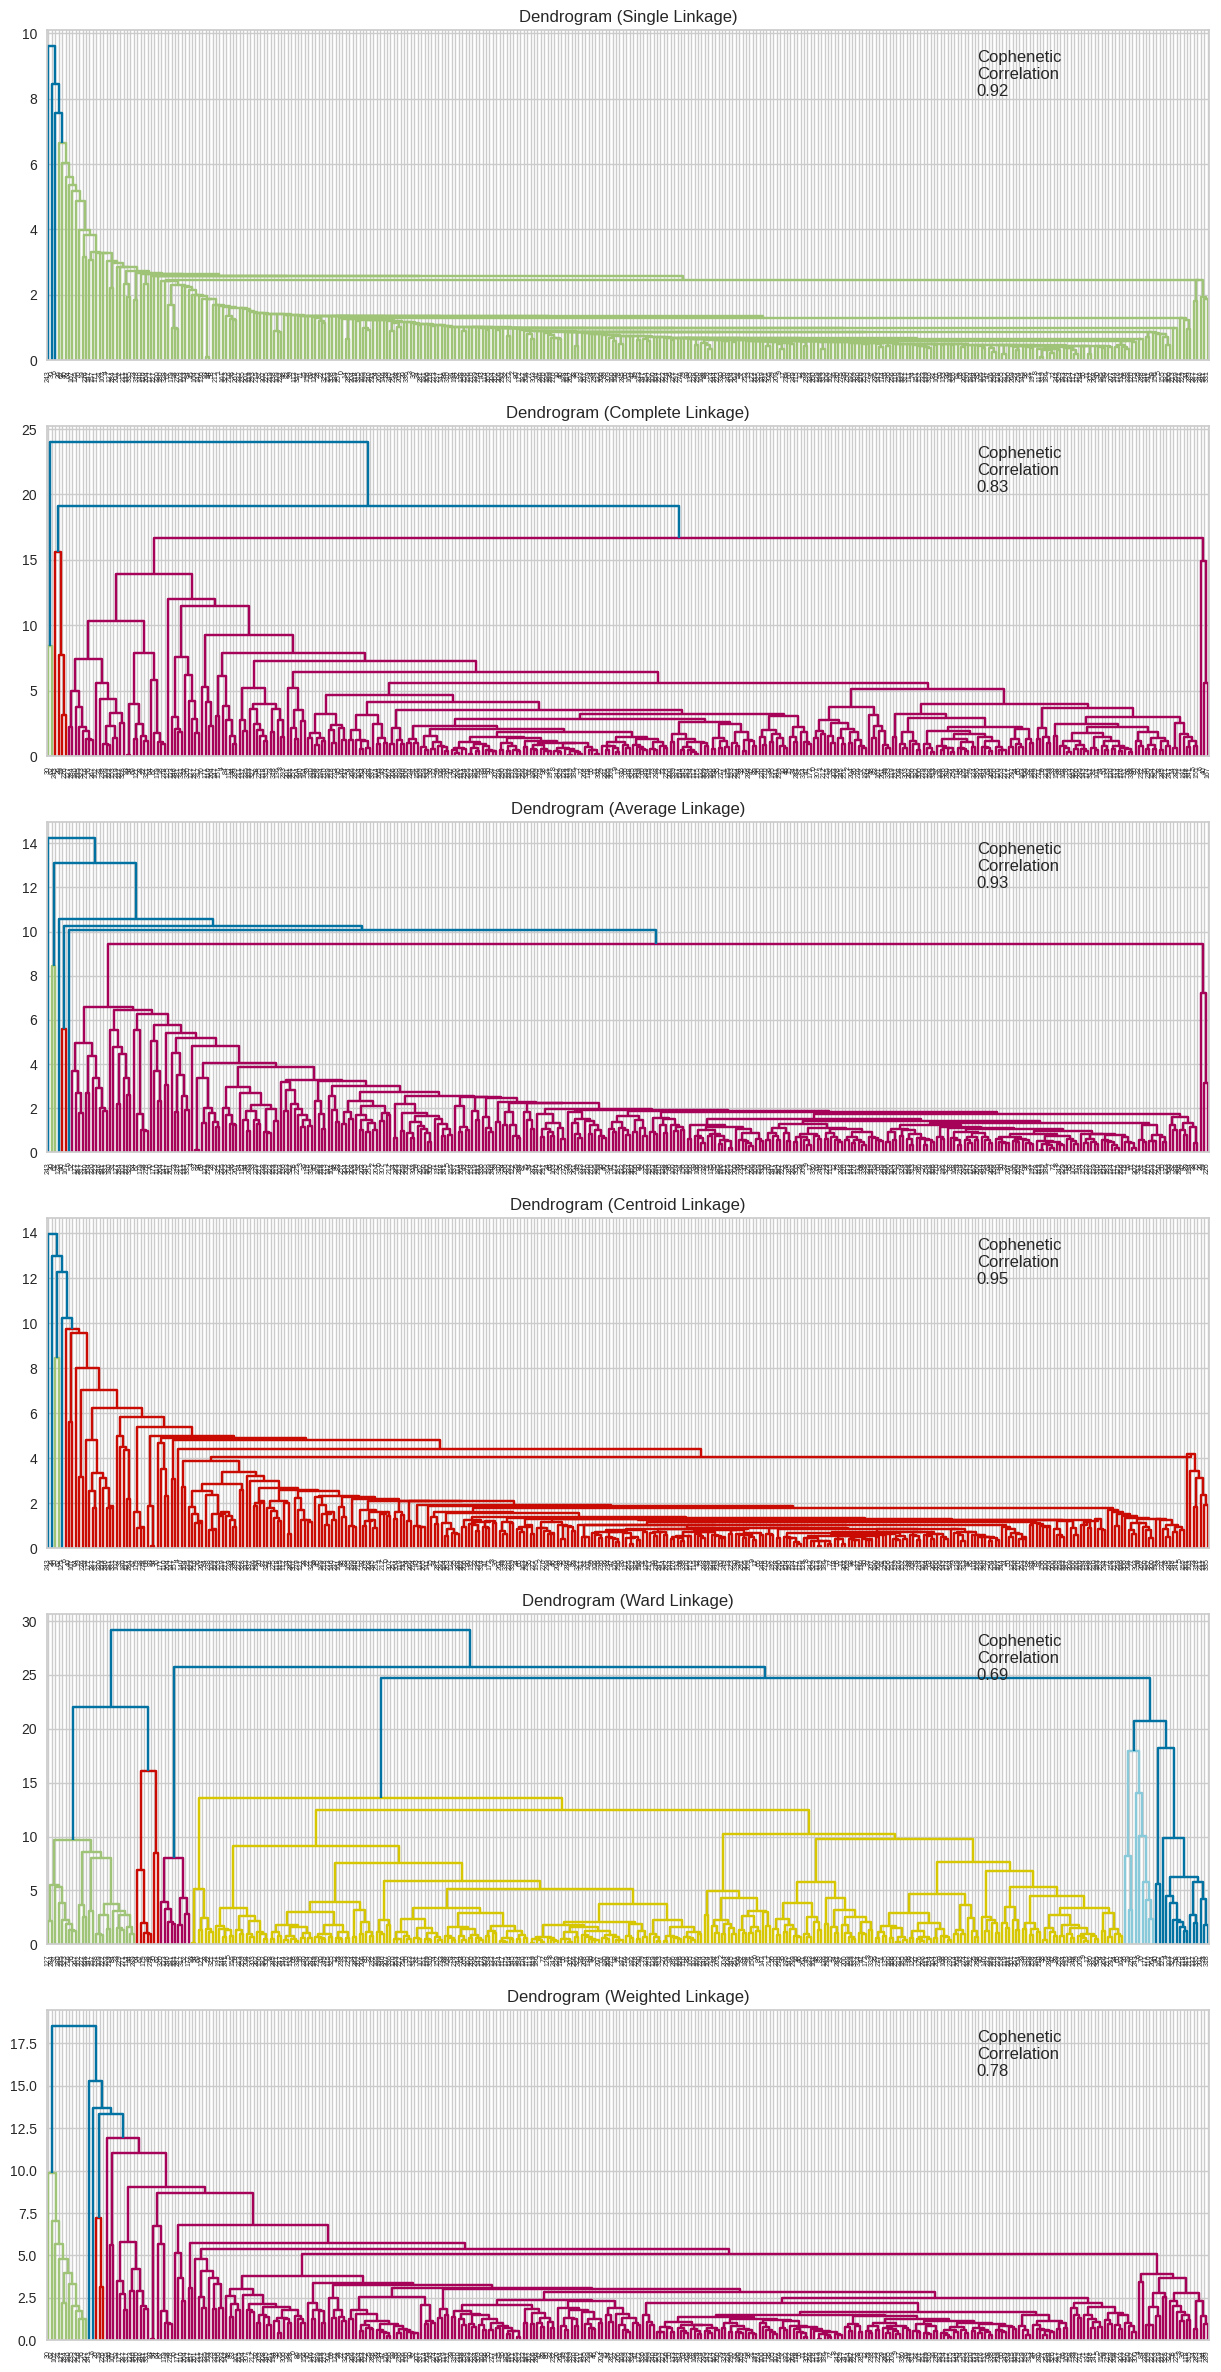

In [47]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- The highest cophenetic correlation belongs to the average linkage and centroid linkage method, which will be used moving forward.

- Based on the relative groupings and visual separations, 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.


In [48]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.691477
5,weighted,0.778059
1,complete,0.831223
0,single,0.919983
2,average,0.933595
3,centroid,0.951286


### Creating model using sklearn

In [49]:
HCmodel = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [50]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [51]:
# Dropping the categorical columns before proceeding with cluster profiling
categorical_cols = ['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']
hc_cluster_profile = df2.drop(categorical_cols, axis=1).groupby("HC_segments").mean()

### Cluster Profiling

In [52]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [53]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


In [54]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

In [55]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

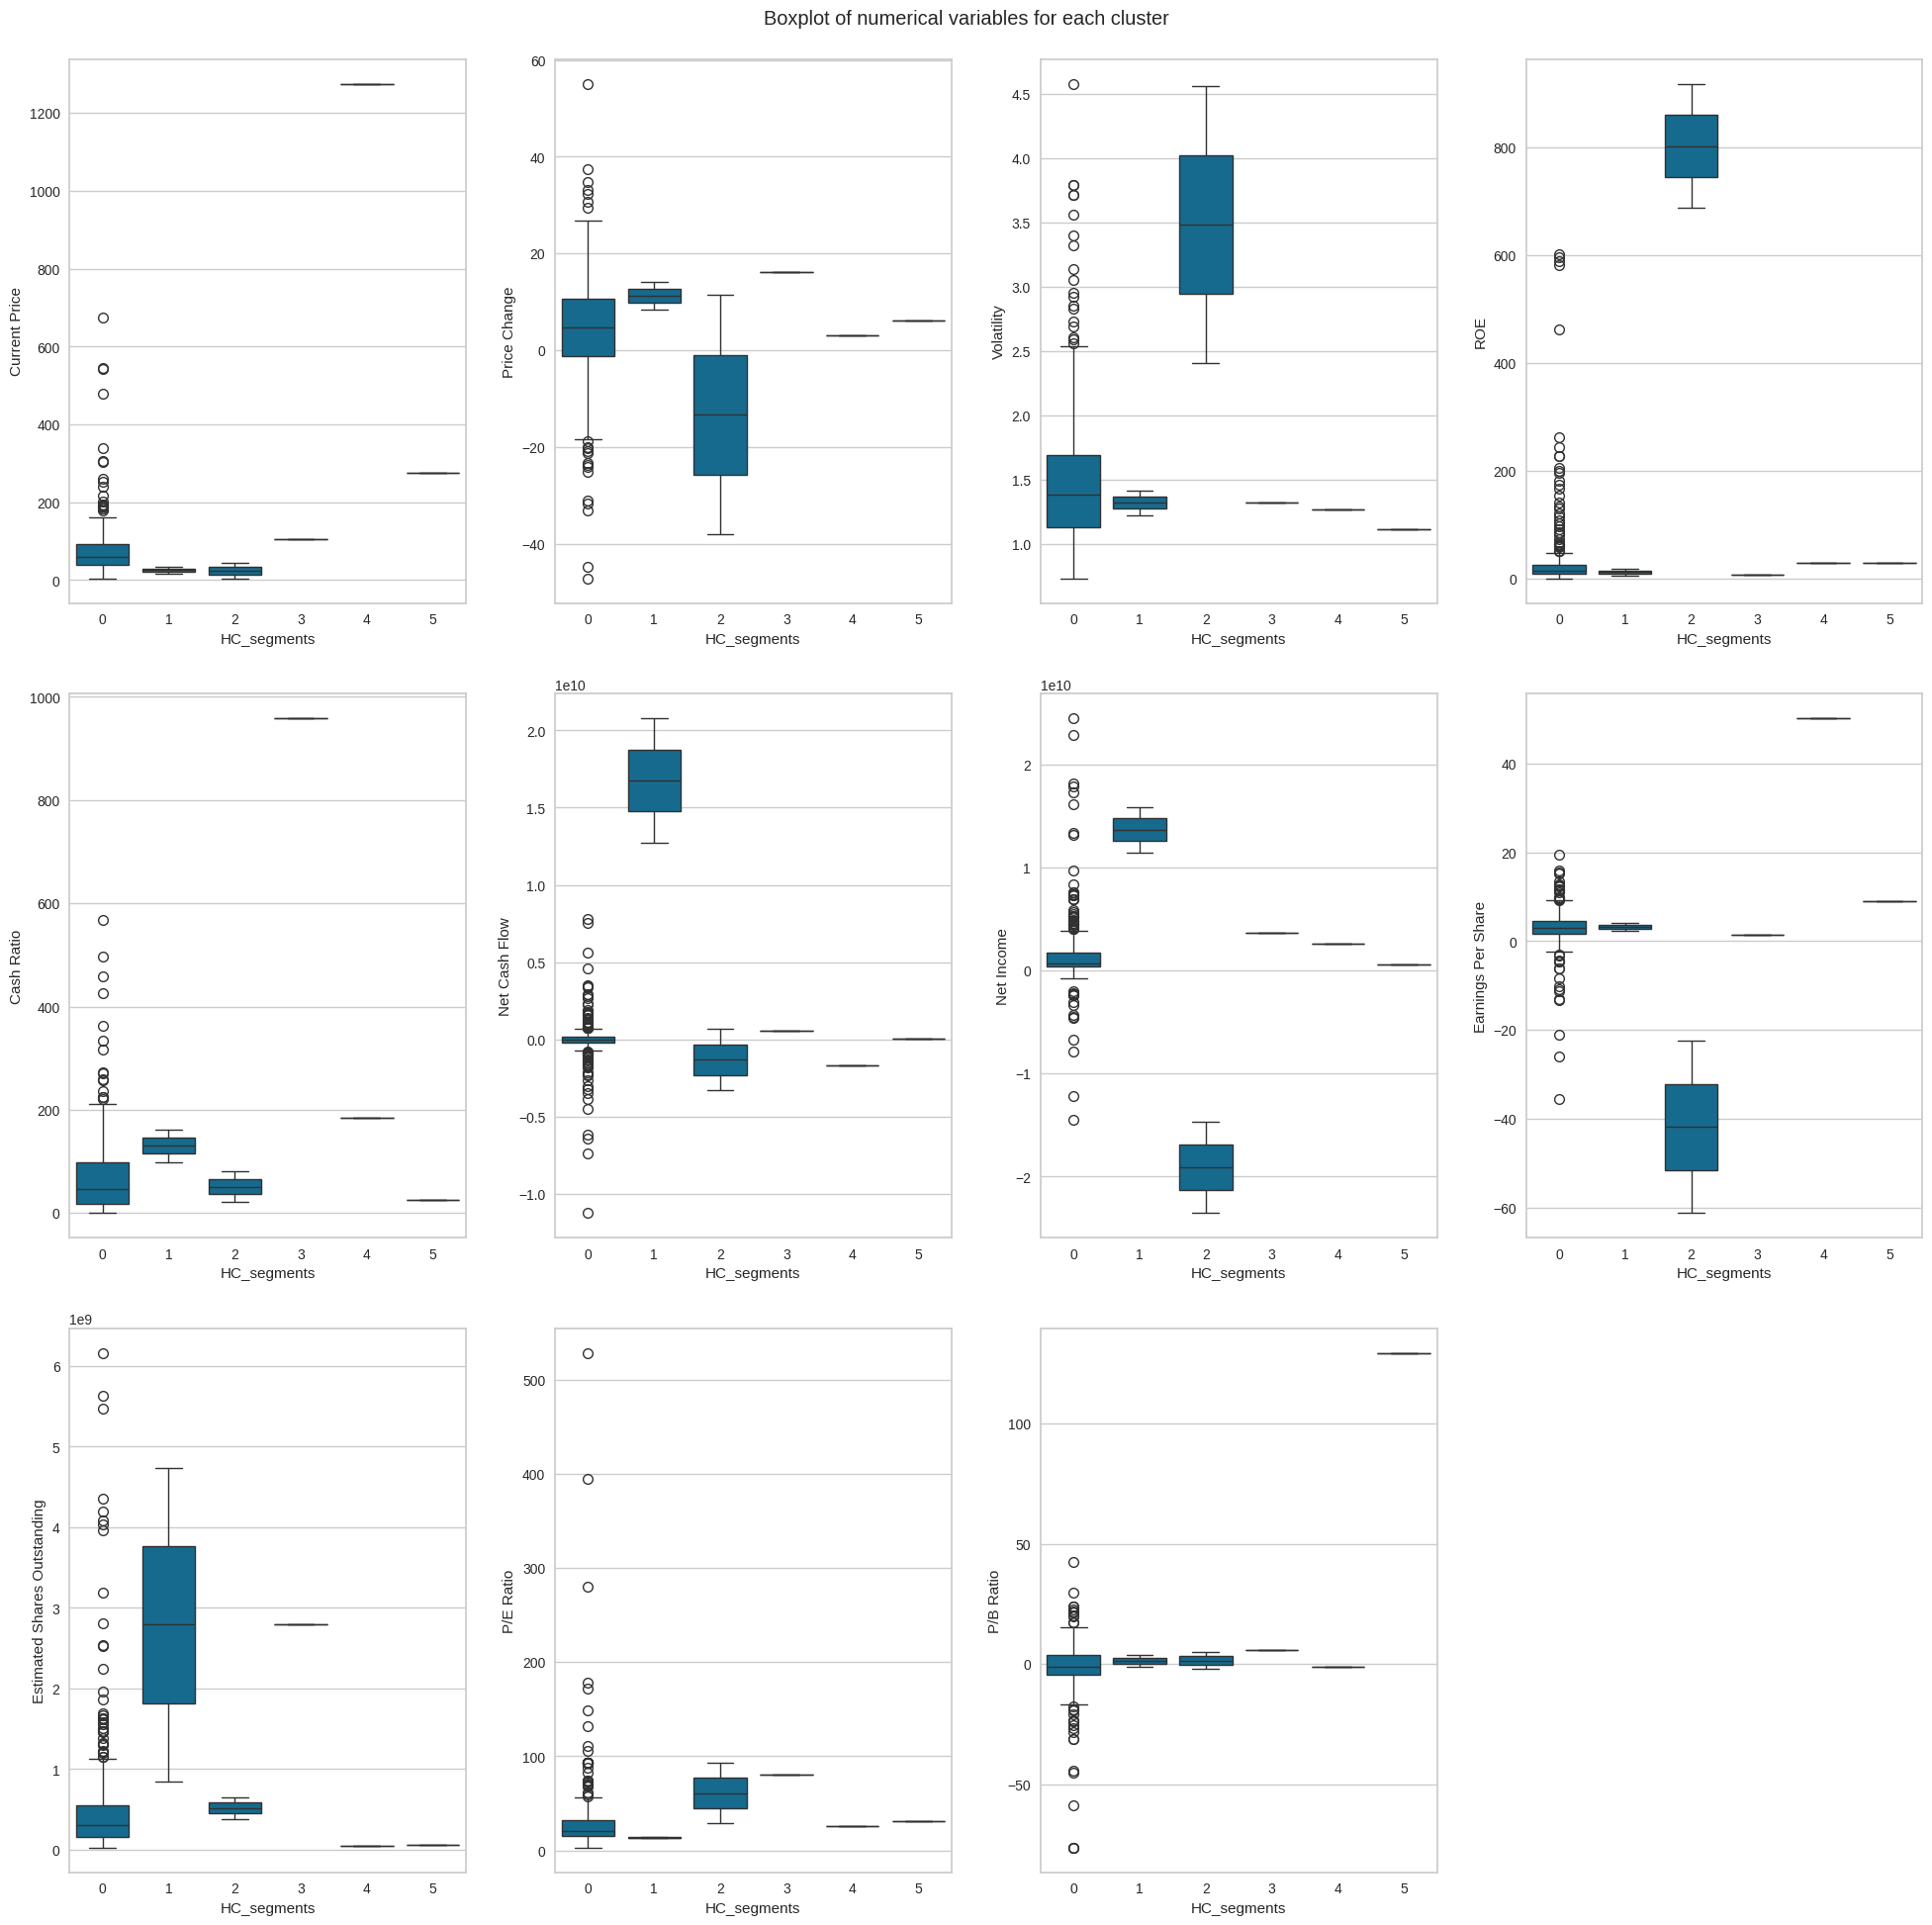

In [56]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**We see that there are 4 clusters of only one or two stocks. These clusters do not have enough variability.**

**Lets try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

### Creating model using sklearn

In [57]:
HCmodel = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage="ward")
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=6)

In [58]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
df2["HC_segments"] = HCmodel.labels_

In [59]:
# Dropping the categorical columns before proceeding with cluster profiling
categorical_cols = ['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']
hc_cluster_profile = df2.drop(categorical_cols, axis=1).groupby("HC_segments").mean()

### Cluster Profiling

In [60]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [61]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,157.189206,10.694798,1.724944,27.904762,305.285714,1906518000.000000,2179452904.761905,3.902857,898181350.345238,44.209694,16.390923,21
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,563.992491,17.235667,1.839399,10.250000,125.500000,105834000.000000,853500250.000000,13.085000,287806305.492500,307.105187,-4.254889,4
3,73.315953,5.185821,1.392291,25.256410,53.956044,15732322.344322,1567909073.260073,3.771374,433826121.547656,23.379818,-3.021976,273
4,35.017647,-15.236944,2.794114,49.269231,54.038462,210478961.538462,-2614993230.769231,-6.725000,533471050.136154,81.246181,1.996887,26
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9


In [62]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle Int

In [63]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Financials                      1
             Health Care                     7
             Information Technology          6
             Materials                       1
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          2
             Health Care                     1
             Information Technology          1
3            Consumer Discretionary         33
             Consumer Staples               15
             Energy                          5
             Financials                     44
             Health Care                    31
             Industrials                    51
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
4            Energy                         22
             Industrials                     1
             Information Technology          2
             Materials                       1
5            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
Name: Security, dtype: int64

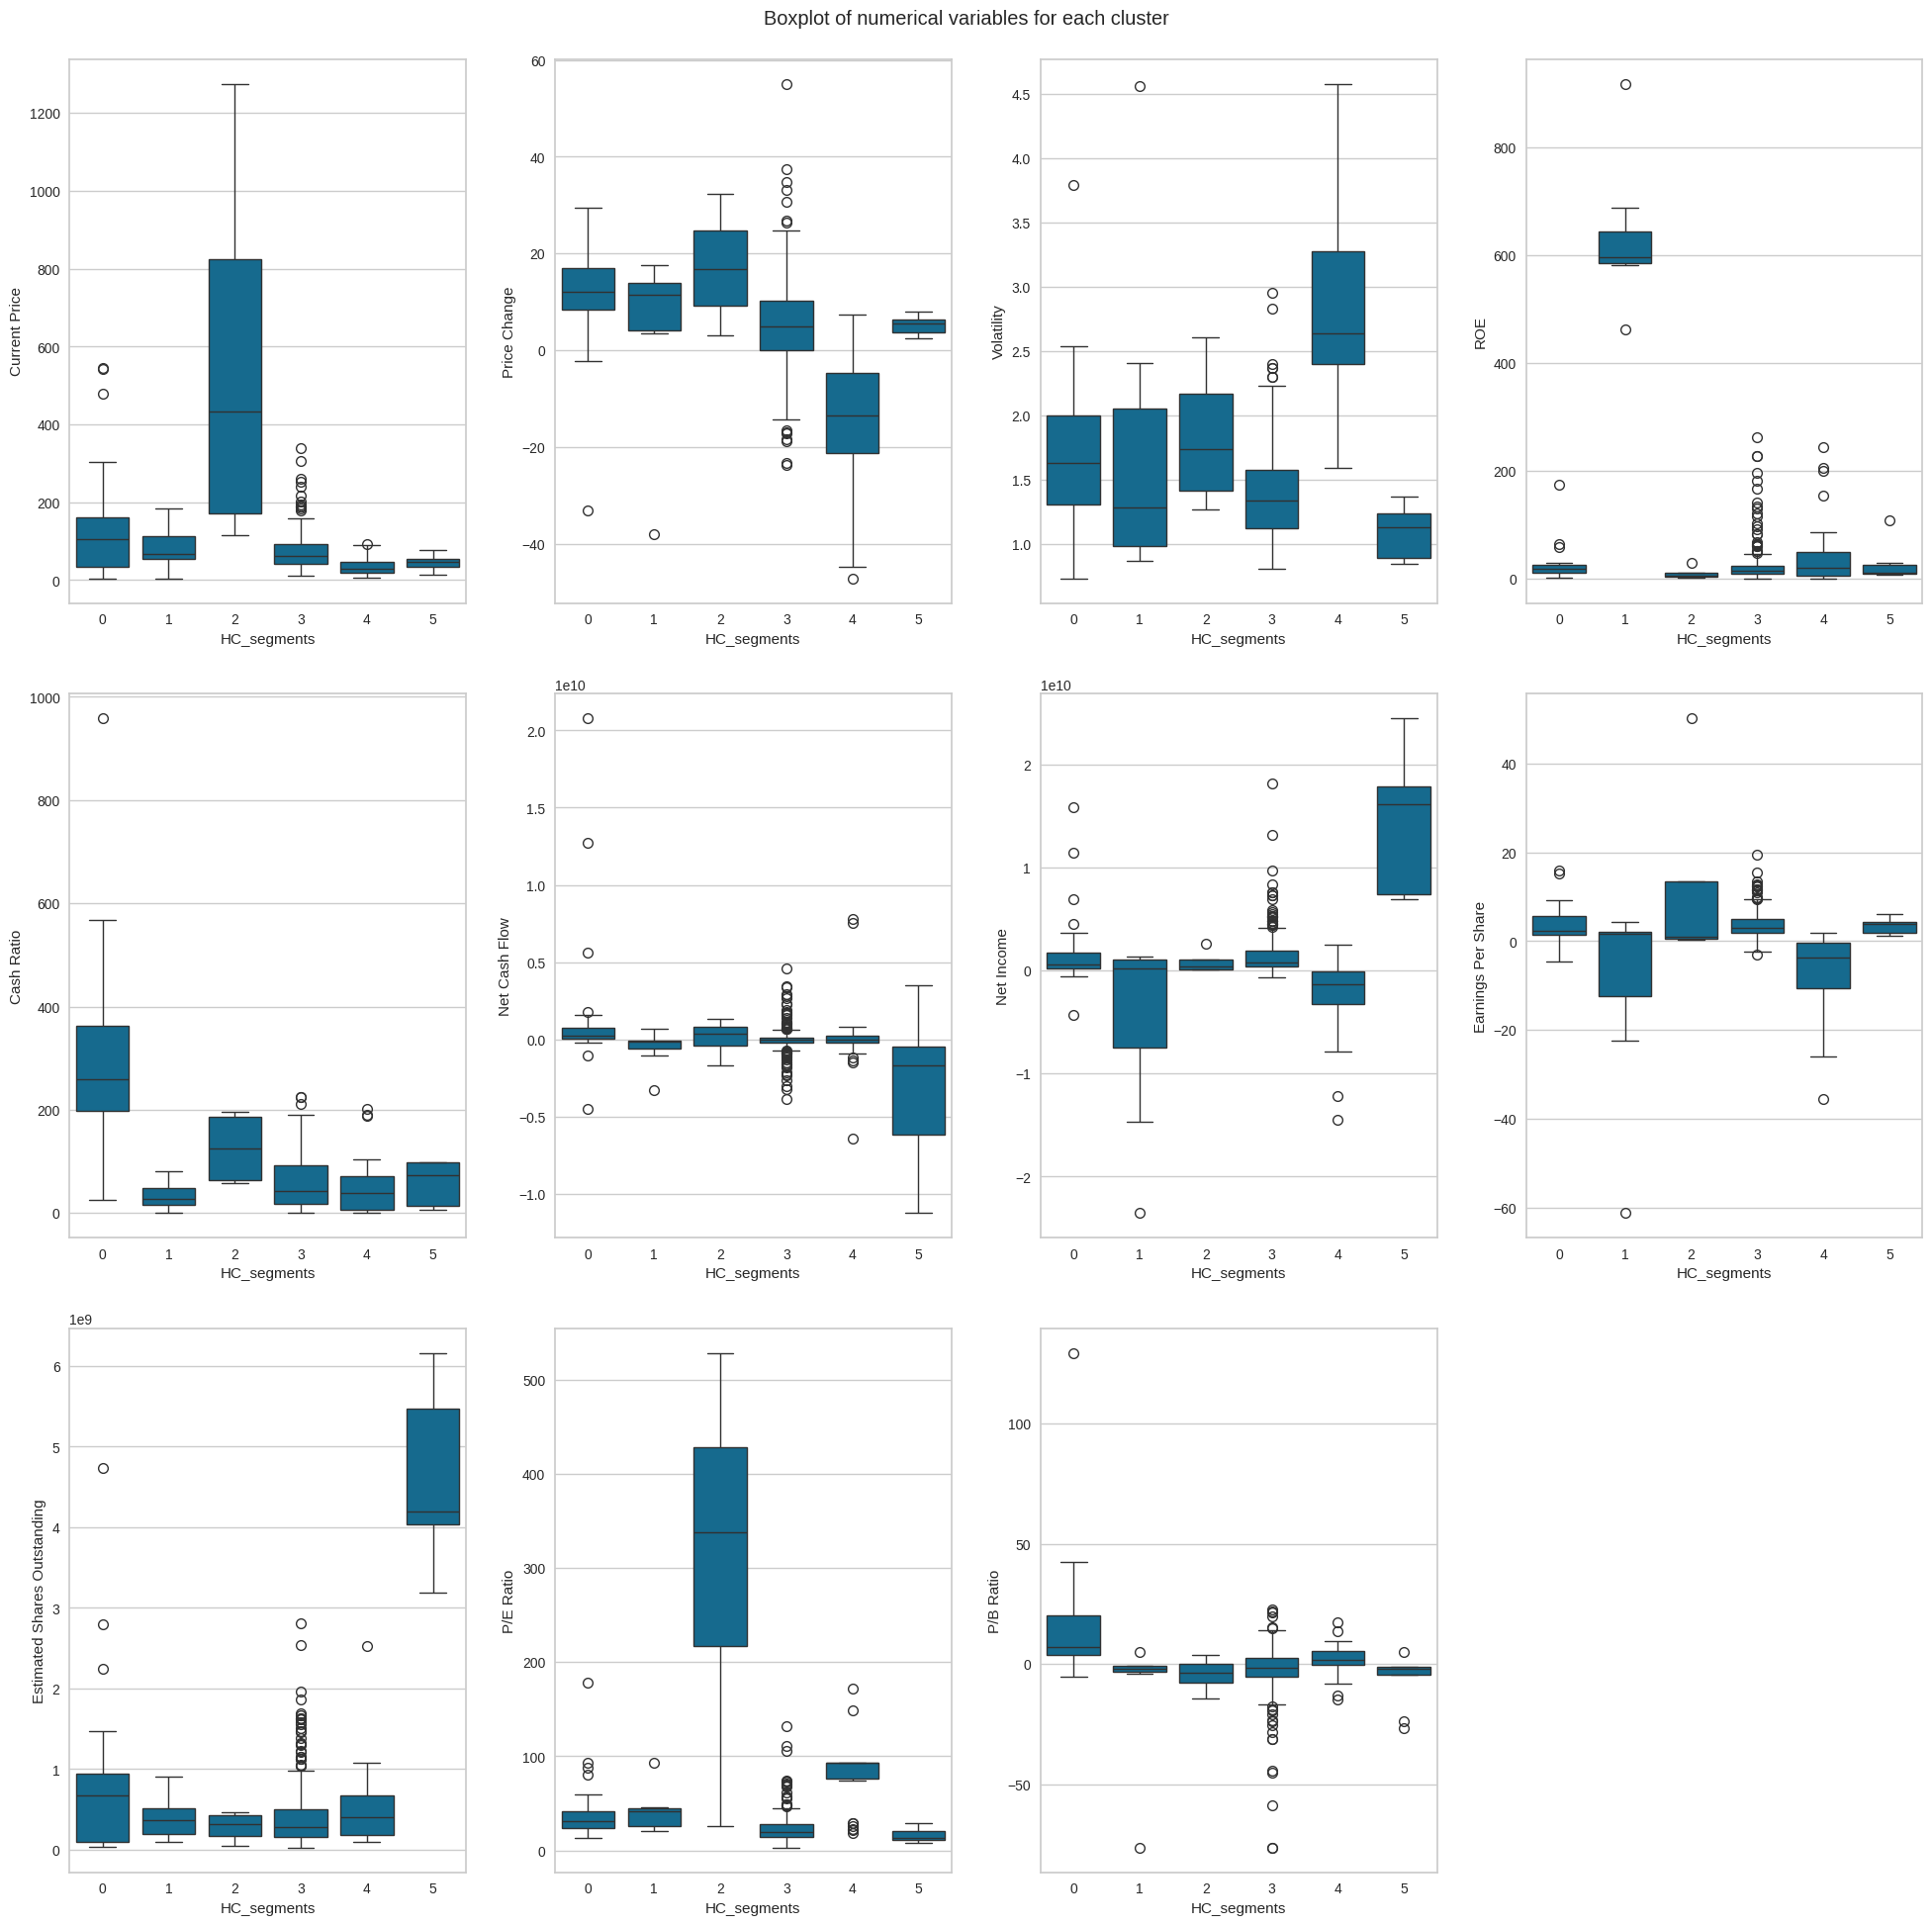

In [64]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)
plt.show()

**The clusters have more variability using the Ward linkage method.**

### Insights


**Cluster 0**
- Characterized by high Cash Ratio and Net Cash Flow, relatively high current prices and market valuations (high P/B Ratio), and positive recent price performance.
- Strong liquidity and cash generation.
- Companies from many sectors, but primarily Information Technology and Health Care.


**Cluster 1**
- Despite having the highest average ROE, this cluster shows significantly negative average Net Cash Flow and Net Income.
- Potentially recent significant cash loss. The average volatility for this cluster is relatively high, indicating that these stocks have experienced notable price swings.

**Cluster 2**
- This cluster shows the highest Current Price and Price Change show
- Characterized by extremely high market valuations (P/E Ratio) and positive recent price performance.
- Only consists of a few companies.


**Cluster 3**
- This is the largest cluster containing the majority number of stocks.
- Generally moderate financial characteristics, all average values fall in moderate ranges, no extremes.
- Diverse representation of sectors.


**Cluster 4**
- Characterized by the very unstable, high volatility of its stocks.
- Shows lowest average values for key profitability metrics, such as, low average Net Cash Flow, Net Income, and Earnings Per Share.
- Primarily from Energy sector.

**Cluster 5**
- Generally larger, more stable stocks with the highest average Net Income and Earnings Per Share.
- Exhibits the lowest average volatility.
- Primarily from Financials and Telecommunications Services sectors.

## K-means vs Hierarchical Clustering

### Stock Cluster Profiles:

-- **Volatile Stocks (Cluster 4 in both K-Means and Hierarchical Ward)**: These are characterized by high volatility and often negative financial performance, predominantly in the Energy sector.

-- **Largest Moderate Group (Cluster 3 in both K-Means and Hierarchical Ward)**: This cluster contains the majority of stocks with average characteristics across various sectors.

-- **High-Value (K-Means Cluster 5 & Hierarchical Cluster 2)**: High current price and P/E ratio, often strong liquidity and positive price change, in Tech, Consumer Discretionary, Healthcare sectors.

-- **High ROE / Recent Struggle Stocks (Hierarchical Cluster 1)**: High ROE but recent significant negative cash flow and income, high volatility, mixed sectors.

-- **Financials (K-Means Cluster 1)**: Very high number of outstanding shares, heavily in the Financials sector, negative P/B ratio.

-- **Highly Volatile - Low Performing (K-Means Cluster 2)**: Extreme volatility, lowest price, and most negative profitability metrics, exclusively Energy sector.

## Actionable Insights and Recommendations



>*   The dataset contains a wide range of numerical features with significant variability and potential outliers.
>*   'Industrials' and 'Financials' are the most represented GICS sectors.
>*   'Oil and Gas Exploration & Production' is the largest GICS sub-industry.
*   Notable correlations exist between financial metrics, such as the strong positive correlation between `Current Price` and `Earnings Per Share`, and the negative correlation between `Price Change` and `Volatility`.
*   'Health Care' stocks, on average, showed the maximum price increase, while 'Energy' stocks experienced significant negative price change.



* Clusters allow for better opportunity and risk management.

*  The individual clusters are also able to provide insights and recommendations regarding specific industries as well.

*   Integrating the clustering analysis into the client recommendation process to provide more data-driven and personalized advice, matching client profiles with the characteristics of the identified stock groups.



---



Sarah Ortega